# *Analyzing Unemployment Data King County, WA*
### By: Gurpal Singh              <br>Date: October 7,2019
## Description:
This project uses two datasets, one containing employment data by county and one containing population by state to analyze unemployment trends and distributions. The datasets were obtained from government websites so they can be deemed reputable (supposedly ;)). See the links below if you would like to obtain the dataset for yourself.

* Employment Data: [United States Department of Agriculture
Economic Research Service](https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/)
* Population Data: [United States Census Bureau](https://www.census.gov/data/tables/time-series/demo/popest/2010s-national-total.html)

## Importing Libraries:
* <font color=blue>pandas</font> for dataframes to make data manipulation easy
* <font color=blue>matplotlib</font> for data visualization
* <font color=blue>numpy</font> for numerical operations on arrays

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

### Reading the datafile '*Unemployment_Data.xls*'
The excel file is read and saved into data frame '*df*'. Next we look at the shape and contents of the dataframe. Unnecessary data is dropped from the dataframe.

In [2]:
df = pd.read_excel(r'Unemployment_Data.xls')
df.head(10)

,"Unemployment and median household income for the U.S., States, and counties, 2007-18",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sources: Unemployment - Bureau of Labor Statis...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Median Household Income - Census Bureau - SAIP...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
7,0,US,United States,NaN,NaN,NaN,152191093,145156134,7034959,4.6,...,160273906,153293830,6980076,4.36,161640488,155344043,6296445,3.9,60336,NaN
8,1000,AL,Alabama,NaN,NaN,NaN,2175612,2089127,86485,4,...,2178243,2081676,96567,4.4,2198837,2112347,86490,3.9,48193,100
9,1001,AL,"Autauga County, AL",2,2,1,24383,23577,806,3.3,...,25972,24958,1014,3.9,25957,25015,942,3.6,58343,121.1


In [3]:
# Drop Junk Rows
df.drop(df.index[[0,1,2,3,4,5]],inplace = True)
df.reset_index(inplace=True)


### Assigning Lablels to the features of the data
Notice the row with index zero contains label names we can use. So let's utilize them.

In [4]:
df.columns = df.iloc[0]
df.reset_index(inplace=True)
df.head(5)

,index,6,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
0,0,6,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
1,1,7,0,US,United States,NaN,NaN,NaN,152191093,145156134,...,160273906,153293830,6980076,4.36,161640488,155344043,6296445,3.9,60336,NaN
2,2,8,1000,AL,Alabama,NaN,NaN,NaN,2175612,2089127,...,2178243,2081676,96567,4.4,2198837,2112347,86490,3.9,48193,100
3,3,9,1001,AL,"Autauga County, AL",2,2,1,24383,23577,...,25972,24958,1014,3.9,25957,25015,942,3.6,58343,121.1
4,4,10,1003,AL,"Baldwin County, AL",3,2,1,82659,80099,...,92090,88342,3748,4.1,93849,90456,3393,3.6,56607,117.5


### Let's drop row 0 because it contains column names and we have already extracted those to our dataframe

In [5]:
df.drop([0],inplace=True)
df.reset_index(inplace=True)
df.head(5)

,level_0,index,6,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
0,1,1,7,0,US,United States,NaN,NaN,NaN,152191093,...,160273906,153293830,6980076,4.36,161640488,155344043,6296445,3.9,60336,NaN
1,2,2,8,1000,AL,Alabama,NaN,NaN,NaN,2175612,...,2178243,2081676,96567,4.4,2198837,2112347,86490,3.9,48193,100
2,3,3,9,1001,AL,"Autauga County, AL",2,2,1,24383,...,25972,24958,1014,3.9,25957,25015,942,3.6,58343,121.1
3,4,4,10,1003,AL,"Baldwin County, AL",3,2,1,82659,...,92090,88342,3748,4.1,93849,90456,3393,3.6,56607,117.5
4,5,5,11,1005,AL,"Barbour County, AL",6,6,0,10334,...,8317,7831,486,5.8,8373,7940,433,5.2,32490,67.4


### Let's also delete columns for Rural_urban_continuum_code_2013 and Urban_influence_code_2013 since these seem useless.

In [6]:
df.drop([6,"FIPS","index","Rural_urban_continuum_code_2013","Urban_influence_code_2013","Metro_2013"], axis = 1,inplace=True)
df.reset_index(inplace=True)
df.head(5)

,index,level_0,State,Area_name,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
0,0,1,US,United States,152191093,145156134,7034959,4.6,153761095,144860350,...,160273906,153293830,6980076,4.36,161640488,155344043,6296445,3.9,60336,NaN
1,1,2,AL,Alabama,2175612,2089127,86485,4,2176489,2053477,...,2178243,2081676,96567,4.4,2198837,2112347,86490,3.9,48193,100
2,2,3,AL,"Autauga County, AL",24383,23577,806,3.3,24687,23420,...,25972,24958,1014,3.9,25957,25015,942,3.6,58343,121.1
3,3,4,AL,"Baldwin County, AL",82659,80099,2560,3.1,83223,79372,...,92090,88342,3748,4.1,93849,90456,3393,3.6,56607,117.5
4,4,5,AL,"Barbour County, AL",10334,9684,650,6.3,10161,9267,...,8317,7831,486,5.8,8373,7940,433,5.2,32490,67.4


## Now our Data is clean and we can proceed!
First let's see how Unemployment has changed over the years in the United States as a whole. Since there other columns by year, we will save unemployment data to a data frame named '*Unemployed*.'<br>
We will also plot population to see how it has changed during those years.<br> ***Note: Population Data only has data for years 2010 - 2018 and code for population is commented so we can analyze trend in Unemployment (scale)***

In [7]:
Unemployed = df[['Unemployed_2007','Unemployed_2008','Unemployed_2009','Unemployed_2010','Unemployed_2011','Unemployed_2012',
         'Unemployed_2013','Unemployed_2014','Unemployed_2015','Unemployed_2016','Unemployed_2017','Unemployed_2018']]
Unemployed.head()

,Unemployed_2007,Unemployed_2008,Unemployed_2009,Unemployed_2010,Unemployed_2011,Unemployed_2012,Unemployed_2013,Unemployed_2014,Unemployed_2015,Unemployed_2016,Unemployed_2017,Unemployed_2018
0,7034959,8900745,14230757,14862528,13840507,12518793,11467541,9618992,8287559,7727644,6980076,6296445
1,86485,123012,238252,231483,212257,173047,156957,146552,131395,127238,96567,86490
2,806,1267,2402,2282,2159,1779,1605,1495,1330,1321,1014,942
3,2560,3851,8048,8339,7627,6349,5654,5301,4859,4831,3748,3393
4,650,894,1431,1262,1137,1079,931,932,765,700,486,433


## Loading the Population Data

In [8]:
pop = pd.read_excel(r'Population_USA.xlsx')
pop.head(10)

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,2010-04-01 00:00:00,NaN,Population Estimate (as of July 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
3,United States,308745538,308758105,309326085,311580009.0,313874218.0,316057727.0,318386421.0,320742673.0,323071342.0,325147121.0,327167434.0
4,Northeast,55317240,55318430,55380645,55600532.0,55776729.0,55907823.0,56015864.0,56047587.0,56058789.0,56072676.0,56111079.0
5,Midwest,66927001,66929743,66974749,67152631.0,67336937.0,67564135.0,67752238.0,67869139.0,67996917.0,68156035.0,68308744.0
6,South,114555744,114563045,114867066,116039399.0,117271075.0,118393244.0,119657737.0,121037542.0,122401186.0,123598424.0,124753948.0
7,West,71945553,71946887,72103625,72787447.0,73489477.0,74192525.0,74960582.0,75788405.0,76614450.0,77319986.0,77993663.0
8,.Alabama,4779736,4780138,4785448,4798834.0,4815564.0,4830460.0,4842481.0,4853160.0,4864745.0,4875120.0,4887871.0
9,.Alaska,710231,710249,713906,722038.0,730399.0,737045.0,736307.0,737547.0,741504.0,739786.0,737438.0


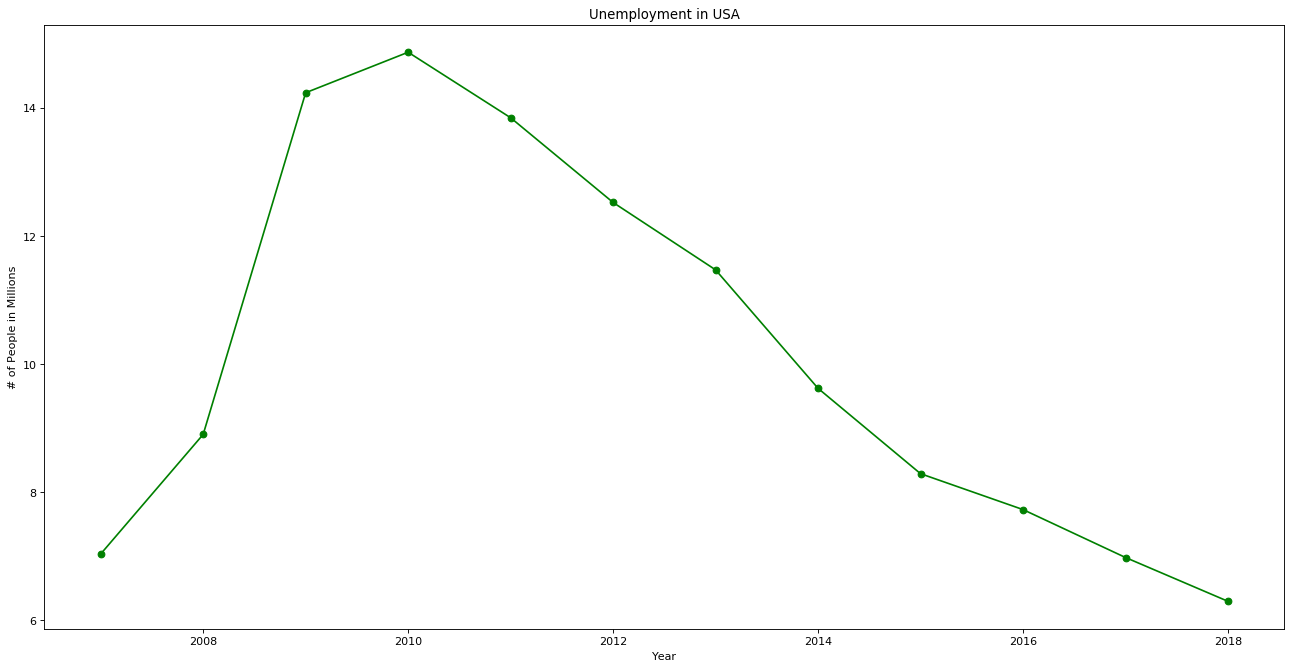

In [9]:
# Making a List for years and extracting data from dataframe and scaling down by 1 million
year = list(range(2007, 2019))
Unemployment_US = list(Unemployed.iloc[0] / 1000000)

# Creating a line graph
plt.figure(num=None, figsize=(20,10), dpi=80)
plt.plot(year, Unemployment_US, color='green', marker='o', linestyle ='solid')

# Add Title and Axis Labels
plt.title("Unemployment in USA")
plt.xlabel("Year")
plt.ylabel("# of People in Millions")

plt.show()

### Insight:
It is clear that unemployment hit a peak in 2010. After doing some research, this is the direct effect of the recession that hit the united states in 2007-2008 due to the housing crisis. We can see from the plot that unemployment sky-rocketed from the years with 2008 to 2009 having the steepest slope. It also appears the decrease in unemployment is leveling out but only future data will confirm this.

## Now let's examine state data and see how it is distributed within the USA.
* Notice, the dataset we have for unemployment has data for all counties. We will need to extract data only for states. First we will need to get some state names to use as search criteria. Using the link below, an csv can be downloaded with State Names.

In [10]:
# Building a list with just state names from State_Data.csv
import csv

State_Names = []
csv.register_dialect('myDialect',
                    delimiter = ',',
                    quoting=csv.QUOTE_ALL,
                    skipinitialspace=True)

with open('State_Data.csv', 'r') as f:
    reader = csv.reader(f, dialect='myDialect')
    for row in reader:
        State_Names.append(row[0])

# We need to remove the first item from the list (label 'State')
State_Names.pop(0)

len(State_Names) # Note: there are 51 elements because data includes District of Columbia


51

### Extracting State Data from the Unemployment Dataset '*df* '.

In [11]:
# Extract State rows to new DataFrame called States 
states = df[df['Area_name'].isin(State_Names)]

# Drop Junk Columns
states.drop(columns=['index','level_0'],inplace=True)

# Reset the index of the dataframe
states.reset_index(inplace=True)

# Print to check
states

C:\Users\Gurpal\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,index,State,Area_name,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
0,1,AL,Alabama,2175612,2089127,86485,4,2176489,2053477,123012,...,2178243,2081676,96567,4.4,2198837,2112347,86490,3.9,48193,100
1,69,AK,Alaska,350785,328579,22206,6.3,356109,332285,23824,...,360759,335682,25077,7,356886,333375,23511,6.6,74058,100
2,102,AZ,Arizona,3034016,2917117,116899,3.9,3104863,2913903,190960,...,3327949,3165127,162822,4.9,3439755,3273550,166205,4.8,56508,100
3,118,AR,Arkansas,1369284,1296572,72712,5.3,1375257,1300017,75240,...,1347630,1297652,49978,3.7,1351496,1301459,50037,3.7,45916,100
4,194,CA,California,17893080,16931590,961490,5.4,18178123,16854482,1323641,...,19205295,18285492,919803,4.8,19398212,18582802,815410,4.2,71785,100
5,253,Co,Colorado,2664677,2565218,99459,3.7,2716625,2585243,131382,...,2992412,2911079,81333,2.7,3096358,2994752,101606,3.3,69113,100
6,318,CT,Connecticut,1856209,1773159,83050,4.5,1881454,1774681,106773,...,1896938,1807506,89432,4.7,1905312,1827070,78242,4.1,74428,100
7,327,DE,Delaware,443573,428312,15261,3.4,447041,424914,22127,...,476844,455489,21355,4.5,482465,464337,18128,3.8,64085,100
8,331,DC,District of Columbia,322237,304426,17811,5.5,330544,309192,21352,...,401450,377153,24297,6.1,404610,382140,22470,5.6,80153,100
9,332,DC,District of Columbia,322237,304426,17811,5.5,330544,309192,21352,...,401450,377153,24297,6.1,404610,382140,22470,5.6,80153,100


In [12]:
# Note there is a duplicate for District of Columbia so we will drop by index
states.drop([8], inplace = True)
states.reset_index(inplace=True)
states

,level_0,index,State,Area_name,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
0,0,1,AL,Alabama,2175612,2089127,86485,4,2176489,2053477,...,2178243,2081676,96567,4.4,2198837,2112347,86490,3.9,48193,100
1,1,69,AK,Alaska,350785,328579,22206,6.3,356109,332285,...,360759,335682,25077,7,356886,333375,23511,6.6,74058,100
2,2,102,AZ,Arizona,3034016,2917117,116899,3.9,3104863,2913903,...,3327949,3165127,162822,4.9,3439755,3273550,166205,4.8,56508,100
3,3,118,AR,Arkansas,1369284,1296572,72712,5.3,1375257,1300017,...,1347630,1297652,49978,3.7,1351496,1301459,50037,3.7,45916,100
4,4,194,CA,California,17893080,16931590,961490,5.4,18178123,16854482,...,19205295,18285492,919803,4.8,19398212,18582802,815410,4.2,71785,100
5,5,253,Co,Colorado,2664677,2565218,99459,3.7,2716625,2585243,...,2992412,2911079,81333,2.7,3096358,2994752,101606,3.3,69113,100
6,6,318,CT,Connecticut,1856209,1773159,83050,4.5,1881454,1774681,...,1896938,1807506,89432,4.7,1905312,1827070,78242,4.1,74428,100
7,7,327,DE,Delaware,443573,428312,15261,3.4,447041,424914,...,476844,455489,21355,4.5,482465,464337,18128,3.8,64085,100
8,9,332,DC,District of Columbia,322237,304426,17811,5.5,330544,309192,...,401450,377153,24297,6.1,404610,382140,22470,5.6,80153,100
9,10,333,FL,Florida,9157124,8789770,367354,4,9215524,8637164,...,10093451,9669228,424223,4.2,10234770,9869673,365097,3.6,52582,100


### Now the State Data is Clean and we can proceed to the plots
We will look at Unemployment data for the year of 2018 as it is the most recent year for which data exists. A histogram will be a good choice to look the distribution among states and it will be plotted in descending order.

51
51
Average Unemployment 2018 = 123456.7843137255


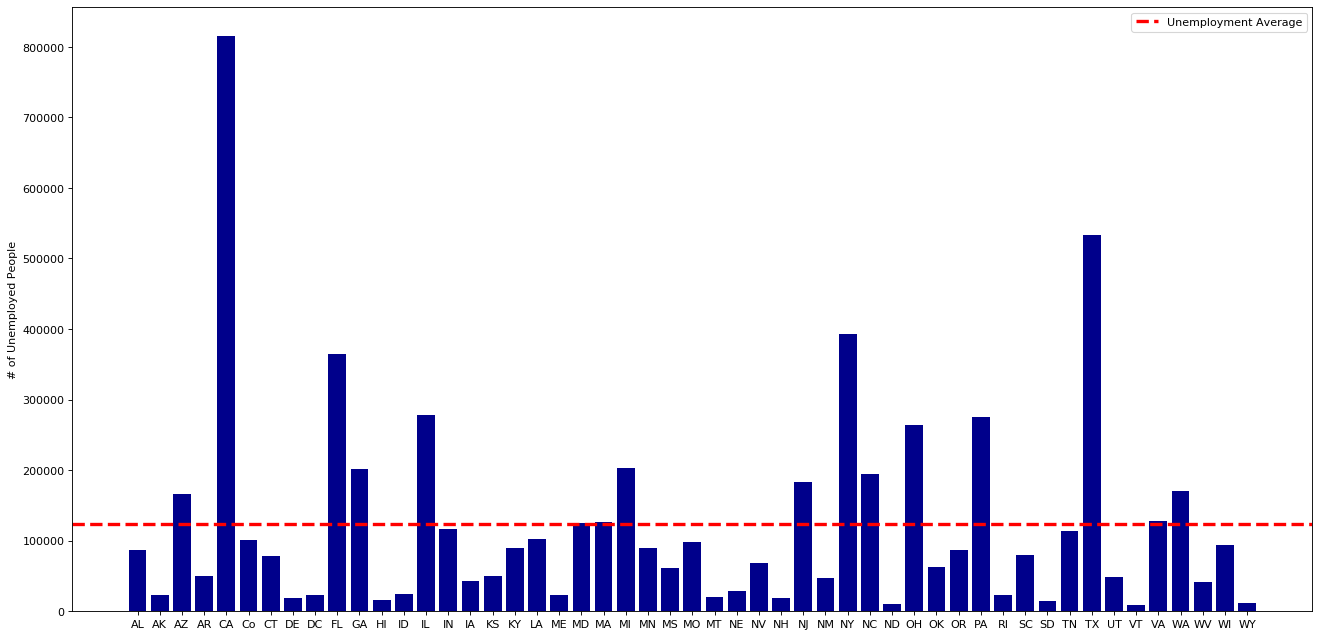

In [13]:
# Saving 2018 Unemployment State data to a list
Unemployment_2018 = states["Unemployed_2018"].tolist()

# We will use state abbreviations for plot for presentation
State_abr = states["State"].tolist()

# Check for match before plotting
print(len(Unemployment_2018))
print(len(State_Names))

# Let's also compute average for reference and plot it
avg_unemploy = np.mean(np.asarray(Unemployment_2018))
print("Average Unemployment 2018 = " + str(avg_unemploy))

# Plotting bar graph and horizontal line for average 
plt.figure(num=None, figsize=(20,10), dpi=80)
plt.axhline(y=avg_unemploy, linestyle = '--', color='red', linewidth = 3)
plt.legend(["Unemployment Average"])
plt.bar(State_abr, Unemployment_2018,color='darkblue')
plt.ylabel("# of Unemployed People")
plt.show()

### Lets make this easier to read and put in descending order.

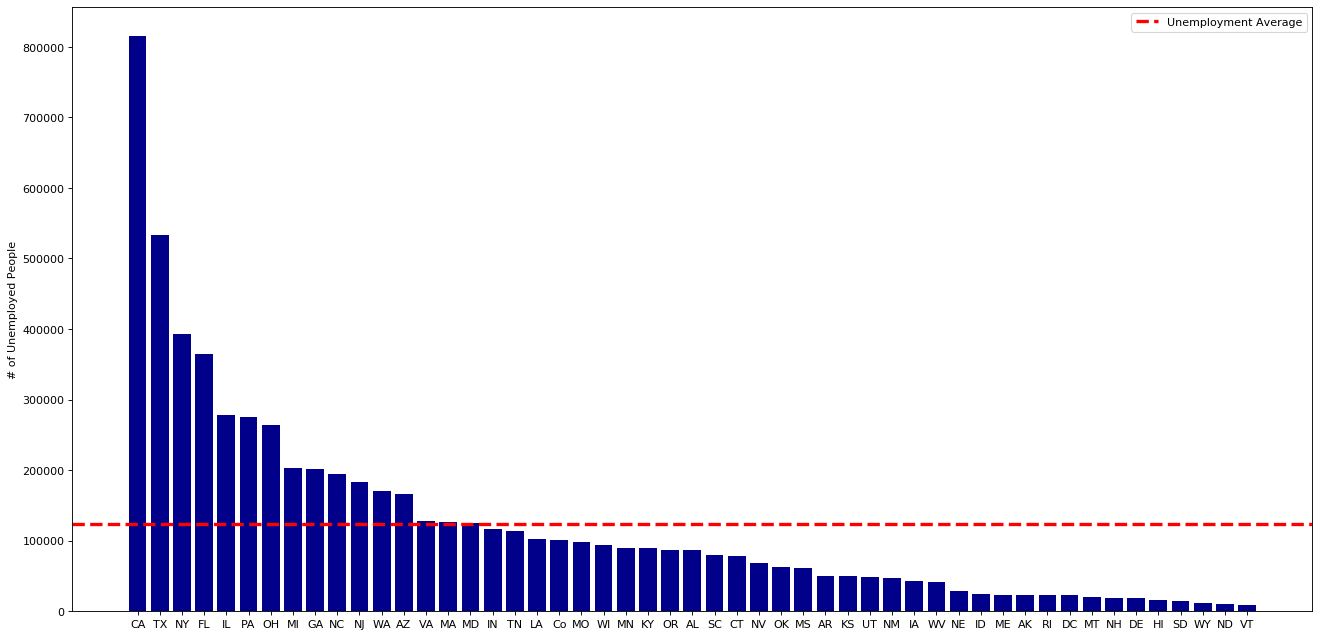

In [14]:
# Sort states by Unemployment to make our graph look cleaner

# Zipping to keep pairs and casting to list, sort, and unzip
Unemp_zip = list(zip(Unemployment_2018,State_abr))
Unemp_zip.sort(reverse = True)
Unemp_unzip = list(zip(*Unemp_zip))

# Plotting
plt.figure(num=None, figsize=(20,10), dpi=80)
plt.axhline(y=avg_unemploy, linestyle = '--', color='red', linewidth = 3)
plt.legend(["Unemployment Average"])
plt.bar(Unemp_unzip[1][:],Unemp_unzip[0][:],color='darkblue')
plt.ylabel("# of Unemployed People")
plt.show()

### Insight:
The plot above doesn't provide much information other than numbers for Unemployment and which states are leading. For a more indicative measure let's form a new measure Unemployment/StatePopulation. This will be better basis for comparison as it regularizes the data.

### Population Data
We loaded the population data earlier in a dataframe named '*pop*'. Now it is time to clean it.

In [15]:
pop.head(5)

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,2010-04-01 00:00:00,NaN,Population Estimate (as of July 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
3,United States,308745538,308758105,309326085,311580009.0,313874218.0,316057727.0,318386421.0,320742673.0,323071342.0,325147121.0,327167434.0
4,Northeast,55317240,55318430,55380645,55600532.0,55776729.0,55907823.0,56015864.0,56047587.0,56058789.0,56072676.0,56111079.0


In [16]:
# Drop irrelevanat rows
pop.drop(pop.index[[0,1,2,3,4,5,6,7]], inplace = True)
pop.reset_index(inplace = True)

In [17]:
pop.head(5)

,index,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,8,.Alabama,4779736,4780138,4785448,4798834.0,4815564.0,4830460.0,4842481.0,4853160.0,4864745.0,4875120.0,4887871.0
1,9,.Alaska,710231,710249,713906,722038.0,730399.0,737045.0,736307.0,737547.0,741504.0,739786.0,737438.0
2,10,.Arizona,6392017,6392288,6407774,6473497.0,6556629.0,6634999.0,6733840.0,6833596.0,6945452.0,7048876.0,7171646.0
3,11,.Arkansas,2915918,2916028,2921978,2940407.0,2952109.0,2959549.0,2967726.0,2978407.0,2990410.0,3002997.0,3013825.0
4,12,.California,37253956,37254523,37320903,37641823.0,37960782.0,38280824.0,38625139.0,38953142.0,39209127.0,39399349.0,39557045.0


In [18]:
# Dropping the unnessary 'Index Column'
pop.drop(columns="index", inplace = True)
pop.head(5)

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,.Alabama,4779736,4780138,4785448,4798834.0,4815564.0,4830460.0,4842481.0,4853160.0,4864745.0,4875120.0,4887871.0
1,.Alaska,710231,710249,713906,722038.0,730399.0,737045.0,736307.0,737547.0,741504.0,739786.0,737438.0
2,.Arizona,6392017,6392288,6407774,6473497.0,6556629.0,6634999.0,6733840.0,6833596.0,6945452.0,7048876.0,7171646.0
3,.Arkansas,2915918,2916028,2921978,2940407.0,2952109.0,2959549.0,2967726.0,2978407.0,2990410.0,3002997.0,3013825.0
4,.California,37253956,37254523,37320903,37641823.0,37960782.0,38280824.0,38625139.0,38953142.0,39209127.0,39399349.0,39557045.0


In [19]:
print(pop.shape)
pop.tail(5)

(58, 12)


,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
53,Note: The estimates are based on the 2010 Cens...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,Suggested Citation:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,"Source: U.S. Census Bureau, Population Division",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,Release Date: December 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Dropping uncessary columns on tail end and giving our label names
pop.drop(pop.index[[51,52,53,54,55,56,57]], inplace = True)
pop.columns = ['State','Census','Estimate Base','2010','2011','2012','2013','2014','2015','2016','2017','2018']
pop.head(5)



,State,Census,Estimate Base,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,.Alabama,4779736,4780138,4785448,4798834.0,4815564.0,4830460.0,4842481.0,4853160.0,4864745.0,4875120.0,4887871.0
1,.Alaska,710231,710249,713906,722038.0,730399.0,737045.0,736307.0,737547.0,741504.0,739786.0,737438.0
2,.Arizona,6392017,6392288,6407774,6473497.0,6556629.0,6634999.0,6733840.0,6833596.0,6945452.0,7048876.0,7171646.0
3,.Arkansas,2915918,2916028,2921978,2940407.0,2952109.0,2959549.0,2967726.0,2978407.0,2990410.0,3002997.0,3013825.0
4,.California,37253956,37254523,37320903,37641823.0,37960782.0,38280824.0,38625139.0,38953142.0,39209127.0,39399349.0,39557045.0


### The Population dataframe is now clean and ready to use.

## Plotting the Unemployent Distribution by State

C:\Users\Gurpal\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Gurpal\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


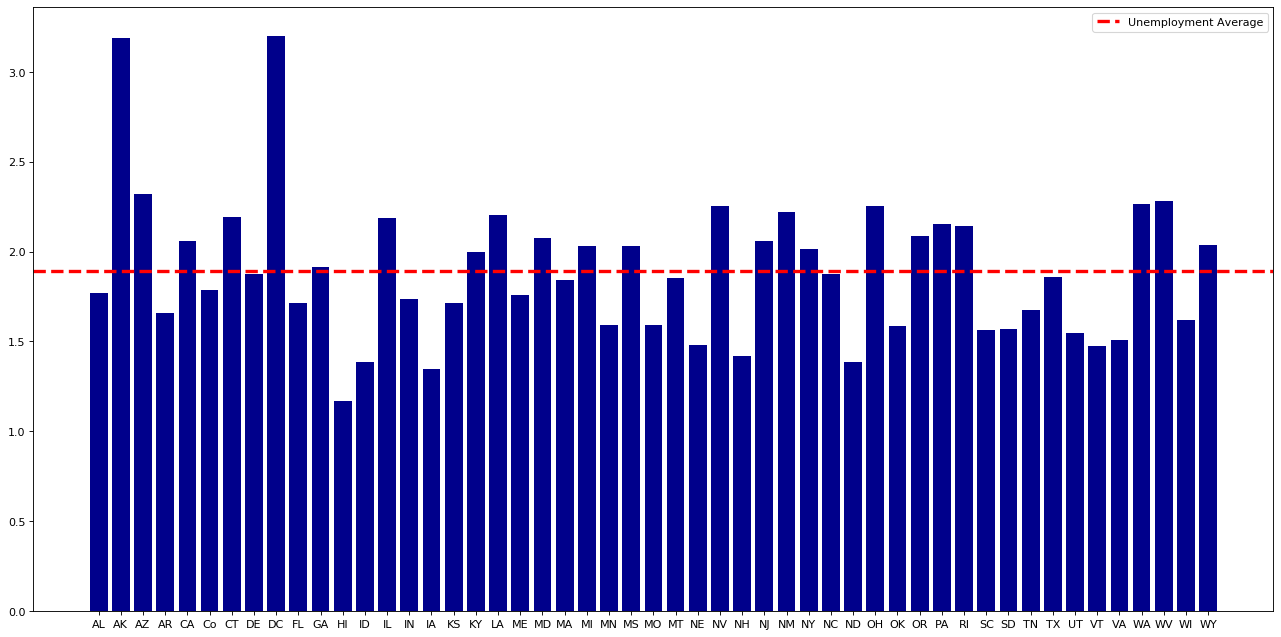

In [21]:
states.loc[:,'Unemployment2018_over_Pop'] = (states['Unemployed_2018'] / pop['2018'] * 100)
avg_2018_Unemployment2018_over_Pop = states.loc[:,"Unemployment2018_over_Pop"].mean()

# No creating another plot for Unemployment per Population 
plt.figure(num=None, figsize=(20,10), dpi=80)
plt.axhline(y=avg_2018_Unemployment2018_over_Pop, linestyle = '--', color='red', linewidth = 3)
plt.legend(["Unemployment Average"])
plt.bar(State_abr, states.loc[:,'Unemployment2018_over_Pop'],color='darkblue')
plt.show()

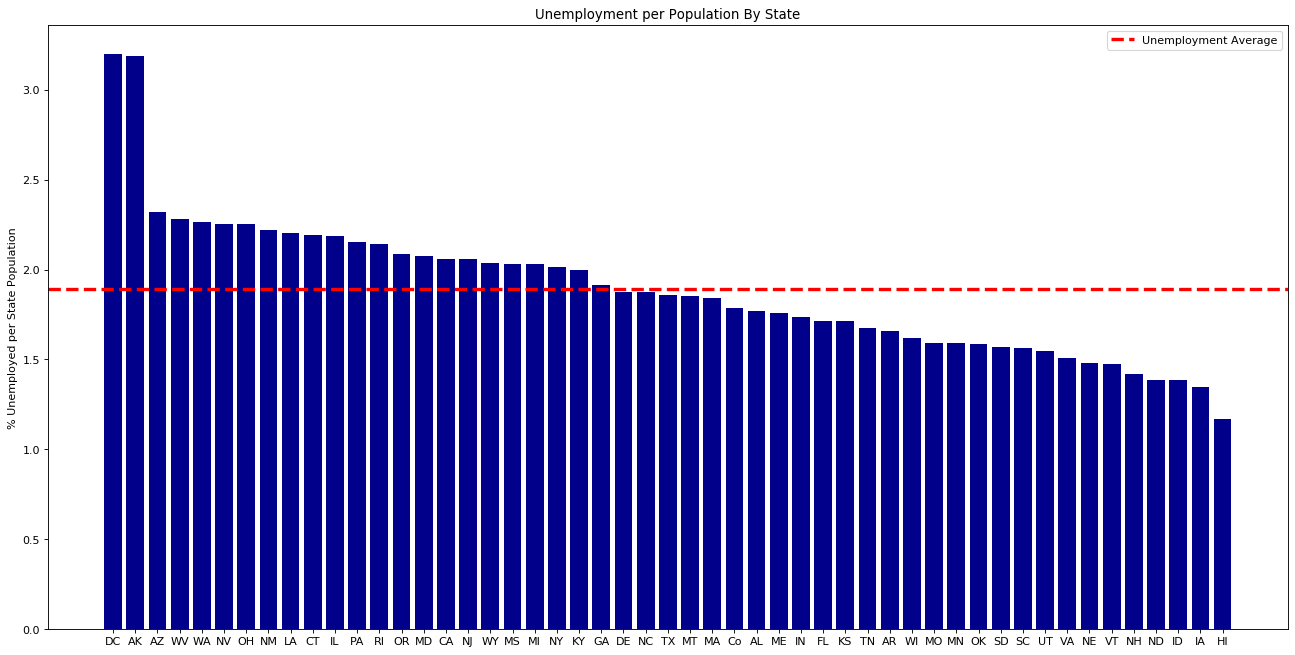

In [22]:
# Saving Unemployment/Population Column to List
Unemp_per_pop = list(states['Unemployment2018_over_Pop'])

# Zipping the list to maintain pairs 
ziplist = zip(Unemp_per_pop, State_abr)

# Cast to list object
ziplist = list(ziplist)

# Using built in sort to put in descending order 
ziplist.sort(reverse = True)

# Unzip & convert to list object
unziplist = zip(*ziplist)
unziplist = list(unziplist)

# Now creating another plot for Unemployment per Population 
plt.figure(num=None, figsize=(20,10), dpi=80)
plt.bar(unziplist[1][:],unziplist[0][:], color='darkblue')
plt.title("Unemployment per Population By State")
plt.ylabel("% Unemployed per State Population")
plt.axhline(y=avg_2018_Unemployment2018_over_Pop, linestyle = '--', color='red', linewidth = 3)
plt.legend(["Unemployment Average"])
plt.show()

In [23]:
# Extract the data for Washington, California, and Idaho
WA_data = states[states['Area_name']=='Washington']
#CA_data = states[states['Area_name']=='California']
#ID_data = states[states['Area_name']=='Idaho']
#Unemployment_US = list(Unemployed.iloc[0] / 100000)

# Extract Unemployment Data for each of the states
WA_Unemployed = WA_data[['Unemployed_2007','Unemployed_2008','Unemployed_2009','Unemployed_2010','Unemployed_2011','Unemployed_2012',
         'Unemployed_2013','Unemployed_2014','Unemployed_2015','Unemployed_2016','Unemployed_2017','Unemployed_2018']]

#CA_Unemployed = CA_data[['Unemployed_2007','Unemployed_2008','Unemployed_2009','Unemployed_2010','Unemployed_2011','Unemployed_2012',
#         'Unemployed_2013','Unemployed_2014','Unemployed_2015','Unemployed_2016','Unemployed_2017','Unemployed_2018']]

#ID_Unemployed = ID_data[['Unemployed_2007','Unemployed_2008','Unemployed_2009','Unemployed_2010','Unemployed_2011','Unemployed_2012',
#         'Unemployed_2013','Unemployed_2014','Unemployed_2015','Unemployed_2016','Unemployed_2017','Unemployed_2018']]


# Scale the data by 100000
WA_Unemployed = list(WA_Unemployed.iloc[0]/100000)
#CA_Unemployed = list(CA_Unemployed.iloc[0]/100000)
#ID_Unemployed = list(ID_Unemployed.iloc[0]/100000)

# Need to scale up US data 10 (earlier it was scaled down by 100000)


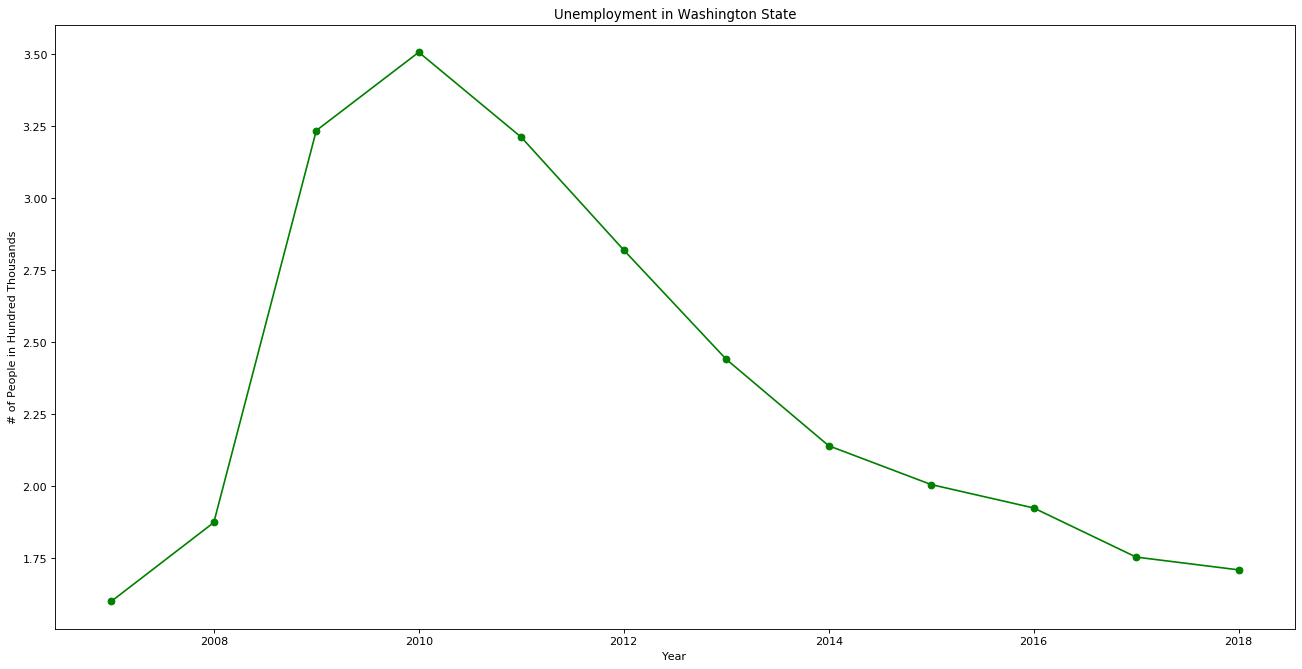

In [24]:
# Plotting WA data and US Data for comparison
plt.figure(num=None, figsize=(20,10), dpi=80)
plt.plot(year, WA_Unemployed, color='green', marker='o', linestyle ='solid')
#plt.plot(year, CA_Unemployed, color='red', marker='o', linestyle='solid')
#plt.plot(year, ID_Unemployed, color='purple', marker='o', linestyle='solid')
# plt.plot(year, Unemployment_US, color='blue', marker='o', linestyle ='solid')

# Add Title and Axis Labels
plt.title("Unemployment in Washington State")
plt.xlabel("Year")
plt.ylabel("# of People in Hundred Thousands")
#plt.legend(["Washington","California","Idaho","USA"])
plt.show()

From the plot we can see Washington State follows a similar trend to the country-wide unemployment. To view Unemployment from the other states simply uncomment the code. They are left out to emphasize the trend in Washington's data. 

## Washington State
Let's get into the details of Washington State. First we will look at the county wide distribution and then the trends in data with King County specifically. 

In [25]:
# Let's dig into Washington's data 
WA_County_Data = df[df['State'].str.match("WA")]
WA_County_Data.drop(columns=["index","level_0"], inplace = True)
WA_County_Data.reset_index(inplace=True)

# We only want counties so remove first row
WA_County_Data.drop(WA_County_Data.index[0],inplace=True)
WA_County_Data.reset_index()
WA_County_Data.head(5)

,index,State,Area_name,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
1,3004,WA,"Adams County, WA",8021,7495,526,6.6,8117,7583,534,...,8878,8369,509,5.7,9479,8968,511,5.4,48056,67.7
2,3005,WA,"Asotin County, WA",10264,9733,531,5.2,10403,9709,694,...,10228,9799,429,4.2,10153,9711,442,4.4,50777,71.6
3,3006,WA,"Benton County, WA",86073,81368,4705,5.5,88789,83988,4801,...,96795,91466,5329,5.5,99084,93924,5160,5.2,64717,91.2
4,3007,WA,"Chelan County, WA",40622,38390,2232,5.5,40871,38445,2426,...,44213,42074,2139,4.8,45580,43517,2063,4.5,57284,80.7
5,3008,WA,"Clallam County, WA",30007,28041,1966,6.6,30083,27811,2272,...,27717,25835,1882,6.8,28030,26240,1790,6.4,49070,69.2


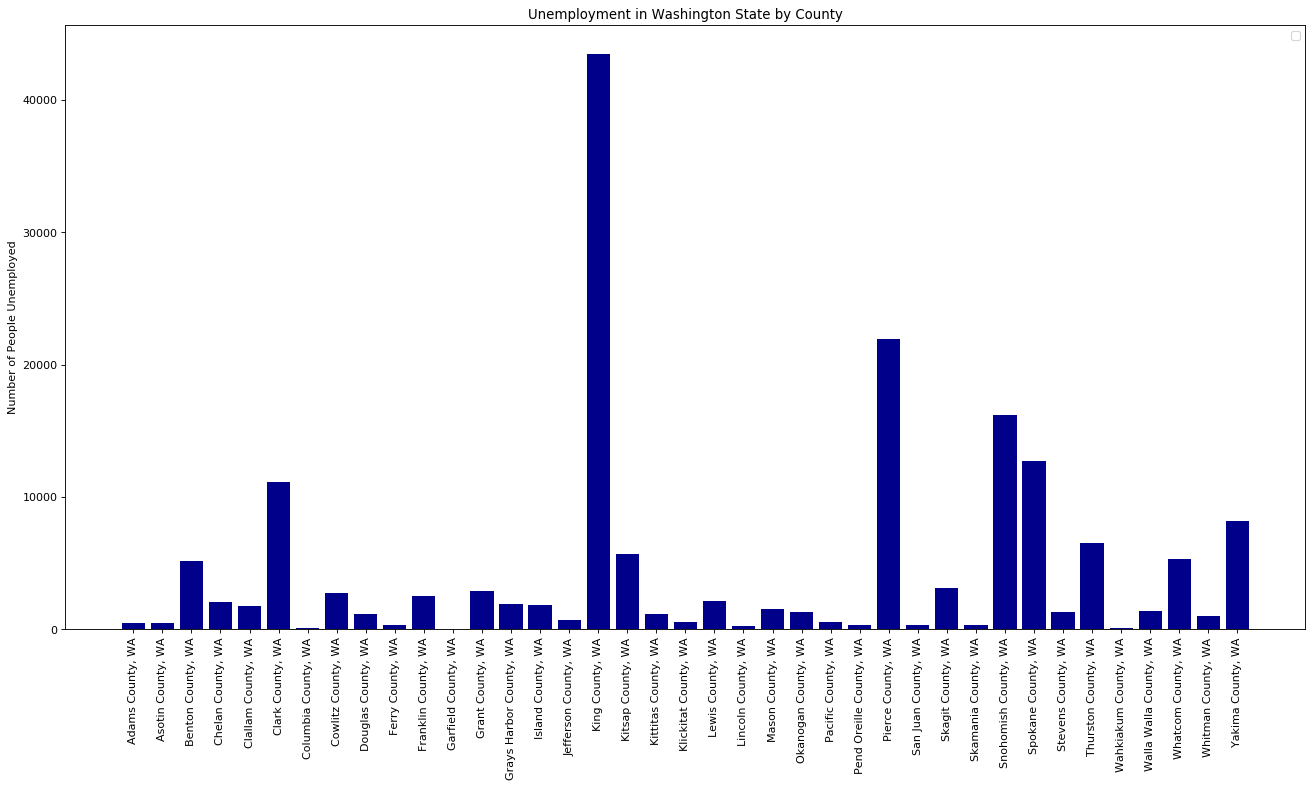

In [26]:
plt.figure(num=None, figsize=(20,10), dpi=80)
plt.legend(["Unemployment Average"])
plt.bar(WA_County_Data.loc[:,'Area_name'], WA_County_Data.loc[:,'Unemployed_2018'],color='darkblue')
plt.xticks(rotation='vertical')
plt.title('Unemployment in Washington State by County')
plt.ylabel('Number of People Unemployed')
plt.show()

## Sorting the data for ease of view

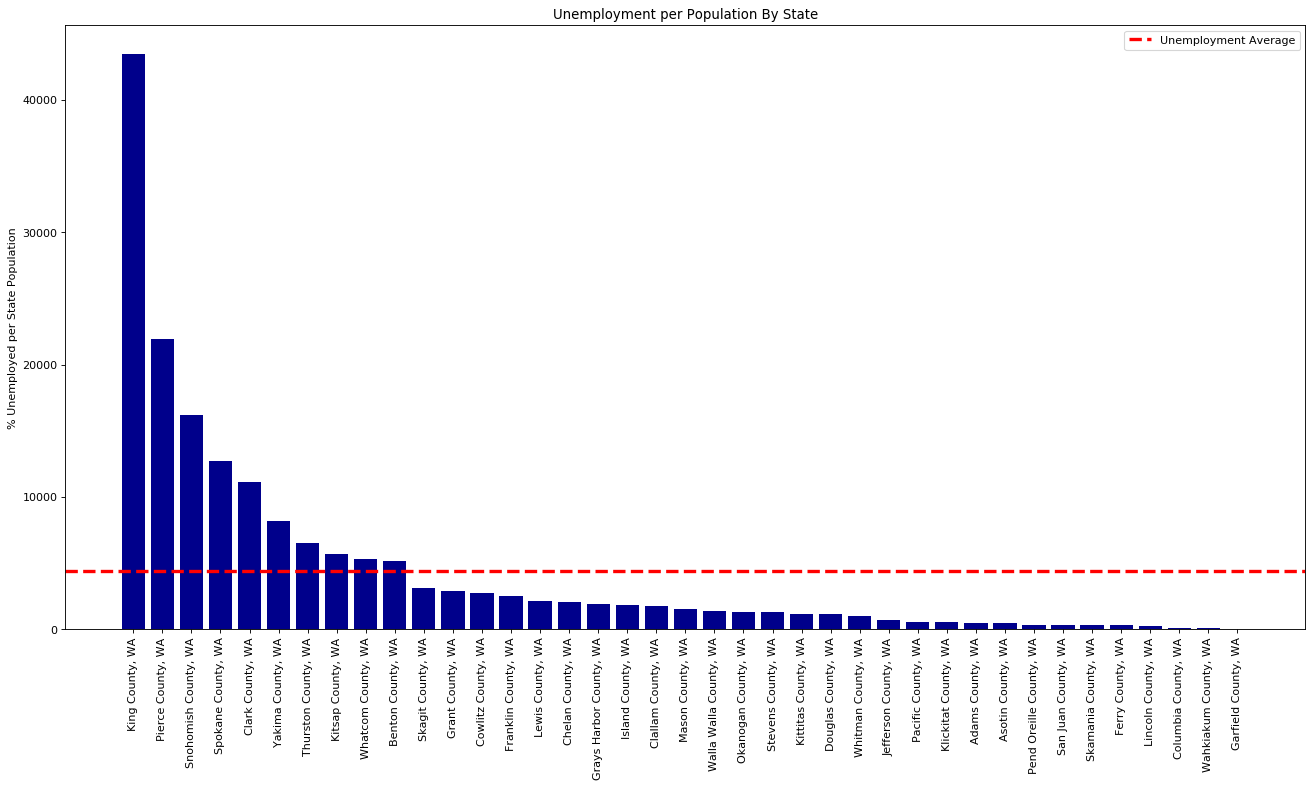

In [27]:
# Calculating the County Average
Unemp_County_Avg = WA_County_Data.loc[:,"Unemployed_2018"].mean()


# Need to sort the chart to put in descending order
County_Names = WA_County_Data['Area_name'].tolist()
WA_Unemployed_2018 = WA_County_Data['Unemployed_2018'].tolist()

# Zipping the list to maintain pairs 
ziplist = zip(WA_Unemployed_2018, County_Names)

# Cast to list object
ziplist = list(ziplist)

# Using built in sort to put in descending order 
ziplist.sort(reverse = True)

# Unzip & convert to list object
unziplist = zip(*ziplist)
unziplist = list(unziplist)

# Now creating another plot for Unemployment per Population 
plt.figure(num=None, figsize=(20,10), dpi=80)
plt.bar(unziplist[1][:],unziplist[0][:], color='darkblue')
plt.title("Unemployment per Population By State")
plt.ylabel("% Unemployed per State Population")
plt.xticks(rotation='vertical')
plt.axhline(y=Unemp_County_Avg, linestyle = '--', color='red', linewidth = 3)
plt.legend(["Unemployment Average"])
plt.show()

## King County
Now let's look at data for King County specifcally as this is where I will reside.

In [28]:

# Lets organize King County Data into 2 Separate Data frames for easy of plotting and calculation
King_data = WA_County_Data[WA_County_Data['Area_name'].str.match('King')]
King_data



,index,State,Area_name,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
17,3020,WA,"King County, WA",1067240,1033216,34024,3.2,1090567,1048196,42371,...,1234122,1189342,44780,3.6,1258687,1215220,43467,3.5,89519,126.2


In [29]:
# Extracting the Data

King_Unemployed = King_data[['Unemployed_2007','Unemployed_2008','Unemployed_2009','Unemployed_2010','Unemployed_2011','Unemployed_2012',
         'Unemployed_2013','Unemployed_2014','Unemployed_2015','Unemployed_2016','Unemployed_2017','Unemployed_2018']]

King_employed = King_data[['Employed_2007','Employed_2008','Employed_2009','Employed_2010','Employed_2011','Employed_2012',
         'Employed_2013','Employed_2014','Employed_2015','Employed_2016','Employed_2017','Employed_2018']]

King_Civ = King_data[['Civilian_labor_force_2007','Civilian_labor_force_2008','Civilian_labor_force_2009','Civilian_labor_force_2010','Civilian_labor_force_2011','Civilian_labor_force_2012',
         'Civilian_labor_force_2013','Civilian_labor_force_2014','Civilian_labor_force_2015','Civilian_labor_force_2016','Civilian_labor_force_2017','Civilian_labor_force_2018']]

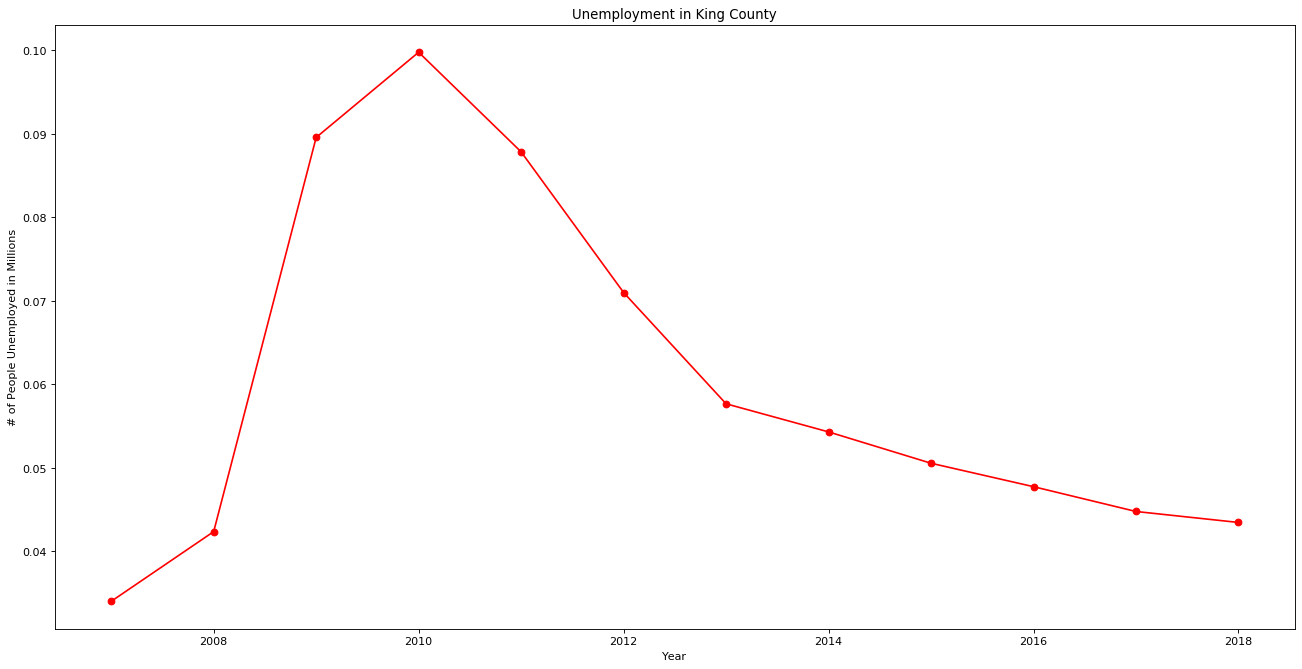

In [30]:
# Plotting Unemployment in King County 
plt.figure(num=None, figsize=(20,10), dpi=80)
plt.plot(year, King_Unemployed.iloc[0]/1000000, color='red', marker='o', linestyle ='solid')
plt.title("Unemployment in King County")
plt.xlabel("Year")
plt.ylabel("# of People Unemployed in Millions")
plt.show()

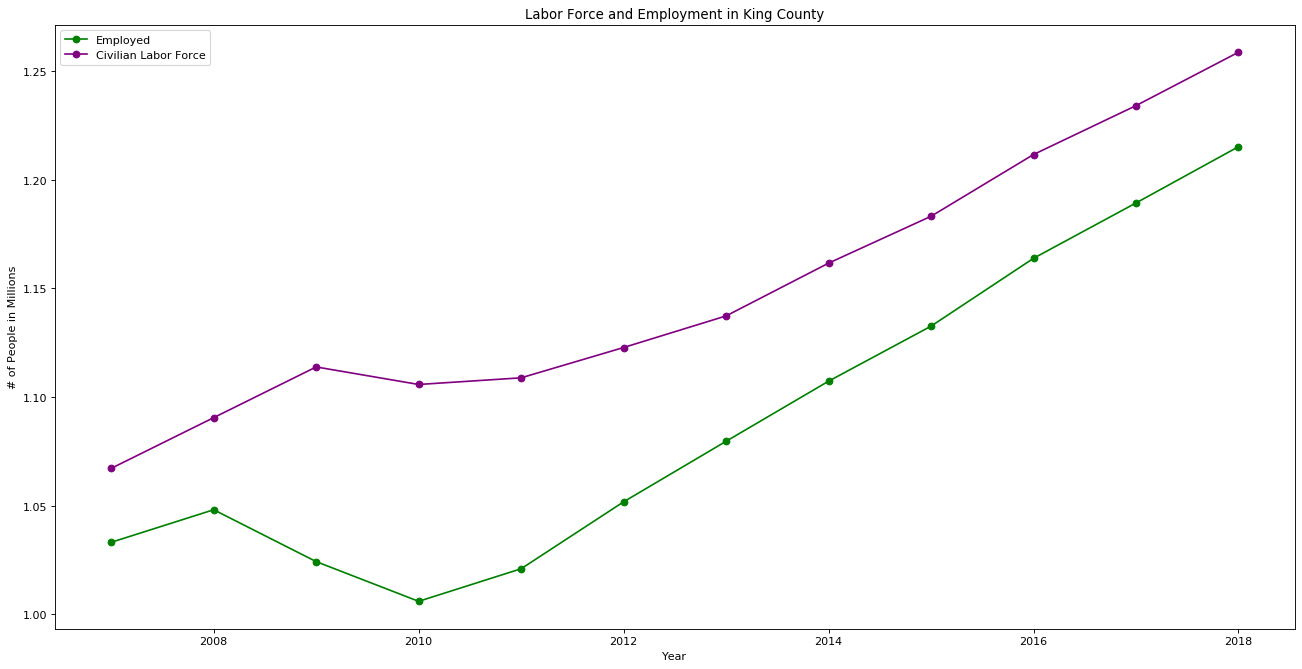

In [31]:
# Plotting Employment and the Civilian Labor Force in King County
plt.figure(num=None, figsize=(20,10), dpi=80)
plt.plot(year, King_employed.iloc[0]/1000000, color='green', marker='o', linestyle ='solid')
plt.plot(year, King_Civ.iloc[0]/1000000, color='purple', marker='o', linestyle ='solid')
plt.title("Labor Force and Employment in King County")
plt.xlabel("Year")
plt.ylabel("# of People in Millions")
plt.legend(["Employed","Civilian Labor Force"])
plt.show()

## Insight:
From the above charts we can see that the unemployment trend almost exactly followed the United States when looking at Washington state and even more specifically the area of King County. When the Employment and Civilian Labor Force data was plotted, it is clear that they have been rising since 2008 with a small dip to reflect the recession. <br>
### So what does this mean?
This data shows that employment in King County is growing and at pretty constant slope. This is a good thing since I am looking for employment in the area. Another thing to consider is the civilian labor force is also growing at the same rate. Since the civilian labor force is greater than the number employed, it is clear there is some competition, and from the trend there always will be. It will be interesting to rerun this model in the future with updated data to see if this gap widens or narrows due the emergence of new tech companies and the massive recent migrations to the Seattle area.